# Spatial analyses

In this file we gather all the three component of our analyses : the POC attenuation, krill abundance/density and krill fishing intensity (catch).

We first make sure that the cooridnates systems and the resolution of all file are harmonised. Then we perfome the spatial analyses.

First we make a correlation plot of each pairs of the variables.

Then  we calculated the 1/3th-tiles of the three datasets and look at the overlap of the upper and lower third-tile.


In [1]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import seaborn as sns

Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

In [31]:
catch = xr.open_dataset('Krill_catch_array_final_all.nc')
catch_p1 = xr.open_dataset('Krill_catch_array_final_1.nc')
catch_p2 = xr.open_dataset('Krill_catch_array_final_2.nc')
catch_p3 = xr.open_dataset('Krill_catch_array_final_3.nc')

catch = catch.rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })
catch_p1 = catch_p1.rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })
catch_p2 = catch_p2.rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })
catch_p3 = catch_p3.rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })

In [32]:
# transform into dataframe

catch = catch.to_dataframe().reset_index().drop(['variable'], axis =1) # 1800 rows × 3 columns
catch_p1 = catch_p1.to_dataframe().reset_index().drop(['variable'], axis =1) # 1800 rows × 3 columns
catch_p2 = catch_p2.to_dataframe().reset_index().drop(['variable'], axis =1) # 1800 rows × 3 columns
catch_p3 = catch_p3.to_dataframe().reset_index().drop(['variable'], axis =1) # 1800 rows × 3 columns

In [33]:
catch = catch.dropna()
catch.set_index(['latitude', 'longitude'], inplace = True) # 227

catch_p1 = catch_p1.dropna()
catch_p1.set_index(['latitude', 'longitude'], inplace = True) # 45 rows

catch_p2 = catch_p2.dropna()
catch_p2.set_index(['latitude', 'longitude'], inplace = True) # 45 rows

catch_p3 = catch_p3.dropna()
catch_p3.set_index(['latitude', 'longitude'], inplace = True) # 45 rows

In [34]:
catch.describe() # take the median as the threshold to define the "most fished areas"

,krill_catch_density_log
count,227.000000
mean,2.527983
std,1.893472
min,0.000000
25%,0.951791
50%,2.390590
75%,3.820170
max,7.384449


Select the cells above the median fishing intensity (catch/spatial unit).

In [35]:
# select the heavy fishing for each period
t = float(catch.median().iloc[0]) # set the threshold = 2.4

## All periods
H_catch = catch.loc[catch['krill_catch_density_log'] > t]
H_catch['High_fishing_ground'] = 1
H_catch # 78 rows

## Period 1
H_catch_p1 = catch_p1.loc[catch['krill_catch_density_log'] > t]
H_catch_p1['High_fishing_ground'] = 1
H_catch_p1 # 77 rows

## Period 2
H_catch_p2 = catch_p2.loc[catch['krill_catch_density_log'] > t]
H_catch_p2['High_fishing_ground'] = 1
H_catch_p2 # 33 rows

## Period 3
H_catch_p3 = catch_p3.loc[catch['krill_catch_density_log'] > t]
H_catch_p3['High_fishing_ground'] = 1
H_catch_p3 # 36 rows

C:\Users\anael\AppData\Local\Temp\ipykernel_6424\2725878264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H_catch['High_fishing_ground'] = 1
C:\Users\anael\AppData\Local\Temp\ipykernel_6424\2725878264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H_catch_p1['High_fishing_ground'] = 1
C:\Users\anael\AppData\Local\Temp\ipykernel_6424\2725878264.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

krill_catch_density_log  High_fishing_ground
latitude longitude                                              
-67       69                       4.102419                    1
          71                       3.790553                    1
-65      -67                       2.672431                    1
         -65                       2.240070                    1
         -63                       6.775990                    1
         -61                       7.739138                    1
          41                       3.792668                    1
          43                       3.218508                    1
          55                       2.060830                    1
-63      -67                       1.101689                    1
         -65                       2.304605                    1
         -63                       5.487548                    1
         -61                       7.035271                    1
         -59                       7.508825                    1
         -57                       6.773175                    1
         -55                       6.415227                    1
         -53                       1.900073                    1
-61      -67                       0.382710                    1
         -63                       1.876059                    1
         -61                       4.648789                    1
         -59                       5.994285                    1
         -57                       5.769950                    1
         -55                       5.311470                    1
         -53                       2.974445                    1
         -51                       3.325295                    1
         -49                       4.620981                    1
         -47                       7.520640                    1
         -45                       7.042438                    1
-59      -49                       3.893405                    1
         -47                       4.971192                    1
         -45                       5.523653                    1
         -43                       4.424981                    1
-55      -39                       2.699548                    1
         -37                       5.119070                    1
         -35                       6.827537                    1
-53      -39                       6.109831                    1
         -37                       6.675614                    1
         -35                       6.749158                    1

### Make the overlap between the three files

In [36]:
# set index here with all coordinates
# make dataset with coordinates
coords = pd.DataFrame({'latitude':np.repeat(np.arange(-69, -51, 2), 101),
                       'longitude': np.tile(np.arange(-53, 149, 2), 9),
                       'label_grid': np.zeros(909)}).set_index(['latitude', 'longitude'])

coords = coords.sort_values(['latitude', 'longitude'])
coords # 909 rows

label_grid
latitude longitude            
-69      -53               0.0
         -51               0.0
         -49               0.0
         -47               0.0
         -45               0.0
...                        ...
-53       139              0.0
          141              0.0
          143              0.0
          145              0.0
          147              0.0

[909 rows x 1 columns]

In [46]:
H_catch_complete = coords.join(H_catch, how='left')
H_catch_complete = H_catch_complete.drop(['krill_catch_density_log', 'label_grid'], axis =1)
H_catch_complete.shape 

H_catch_p1_complete = coords.join(H_catch_p1, how='left')
H_catch_p1_complete = H_catch_p1_complete.drop(['krill_catch_density_log', 'label_grid'] , axis =1)
H_catch_p1_complete.dropna().shape 

H_catch_p2_complete = coords.join(H_catch_p2, how='left')
H_catch_p2_complete = H_catch_p2_complete.drop(['krill_catch_density_log', 'label_grid'] , axis =1)
H_catch_p2_complete.dropna().shape 

H_catch_p3_complete = coords.join(H_catch_p3, how='left')
H_catch_p3_complete = H_catch_p3_complete.drop(['krill_catch_density_log', 'label_grid'] , axis =1)
H_catch_p3_complete.dropna().shape 

(21, 1)

##### Plot the overlaps 

In [47]:
H_catch_to_plot = xr.Dataset.from_dataframe(H_catch_complete) # convert into xarrayDataset
H_catch_to_plot = xr.Dataset.to_array(H_catch_to_plot)

H_catch_p1_to_plot = xr.Dataset.from_dataframe(H_catch_p1_complete) # convert into xarrayDataset
H_catch_p1_to_plot = xr.Dataset.to_array(H_catch_p1_to_plot)

H_catch_p2_to_plot = xr.Dataset.from_dataframe(H_catch_p2_complete) # convert into xarrayDataset
H_catch_p2_to_plot = xr.Dataset.to_array(H_catch_p2_to_plot)

H_catch_p3_to_plot = xr.Dataset.from_dataframe(H_catch_p3_complete) # convert into xarrayDataset
H_catch_p3_to_plot = xr.Dataset.to_array(H_catch_p3_to_plot)

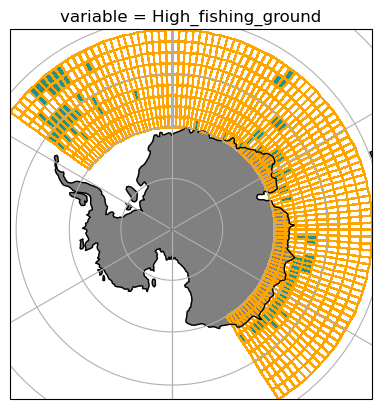

In [48]:
# Map all years
map_proj = ccrs.SouthPolarStereo()

p = H_catch_to_plot.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False, 
    color ='orange' #grid OK
)  # the plot's projection


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
plt.show(p)

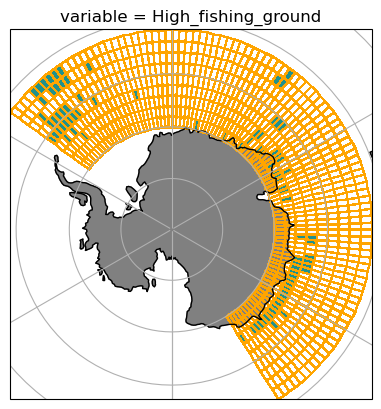

In [49]:
# Map period 1
map_proj = ccrs.SouthPolarStereo()

p = H_catch_p1_to_plot.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False, 
    color ='orange' #grid OK
)  # the plot's projection


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
plt.show(p)

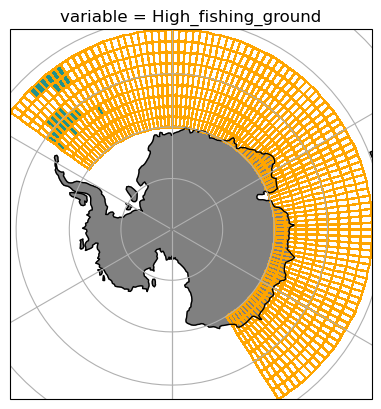

In [50]:
# Map period 2
map_proj = ccrs.SouthPolarStereo()

p = H_catch_p2_to_plot.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False, 
    color ='orange' #grid OK
)  # the plot's projection


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
plt.show(p)

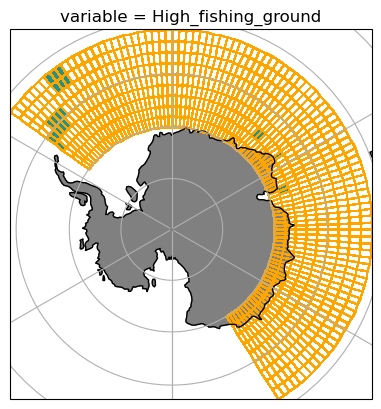

In [51]:
# Map period 3
map_proj = ccrs.SouthPolarStereo()

p = H_catch_p3_to_plot.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False, 
    color ='orange' #grid OK
)  # the plot's projection


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
plt.show(p)

# Save the file with the "high fishing grounds"

In [55]:
os.chdir('./Key_Areas_krill_carbon_sequestration/output_results/')
# Save the dataframe
H_catch_complete.dropna().to_csv('H_catch.csv')

H_catch_p1_complete.dropna().to_csv('H_catch_p1.csv')

H_catch_p2_complete.dropna().to_csv('H_catch_p2.csv')

H_catch_p3_complete.dropna().to_csv('H_catch_p3.csv')